In [1]:
# All imports
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import sys
sys.path.append("..")

from utils.loading_data  import load_to_df_from_csv
from utils.plotting import draw_histogram

In [2]:
# Loading train dataset
train = load_to_df_from_csv("../data/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

## 1. Do men / women dominate speaking roles in Hollywood movies?

### a) Is there a balance in gender when it comes to the number of actors engaged in movies?

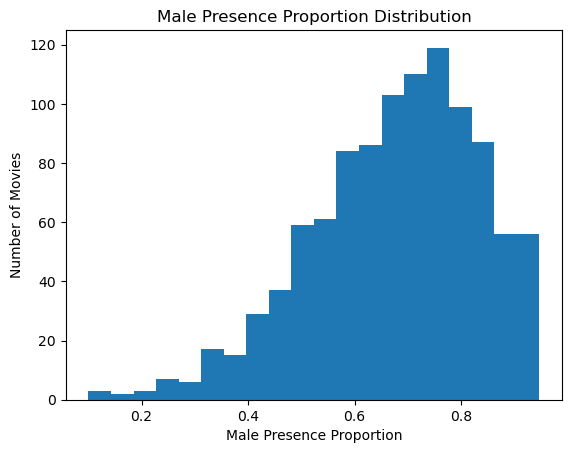

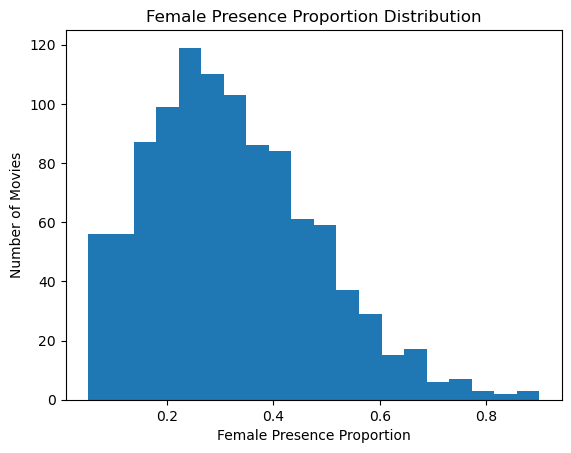

In [3]:
# Create a dataframe with number of male actors and number of female actors
gender_presence = train[["Number of male actors", "Number of female actors"]]

gender_presence["no_of_actors"] = train["Number of male actors"] + train["Number of female actors"]
gender_presence["female_presence"] = train["Number of female actors"] / gender_presence["no_of_actors"]
gender_presence["male_presence"] = train["Number of male actors"] / gender_presence["no_of_actors"]

draw_histogram(gender_presence.male_presence, 20, "Male Presence Proportion", "Number of Movies", "Male Presence Proportion Distribution")
draw_histogram(gender_presence.female_presence, 20, "Female Presence Proportion", "Number of Movies", "Female Presence Proportion Distribution")

### b) Is there a gender balance when it comes to the number of words spoken by actors in movies?

First we check if there is a balance in gender when it comes to the number of words spoken by actors without considering the gender composition of the actors involved in the movies.

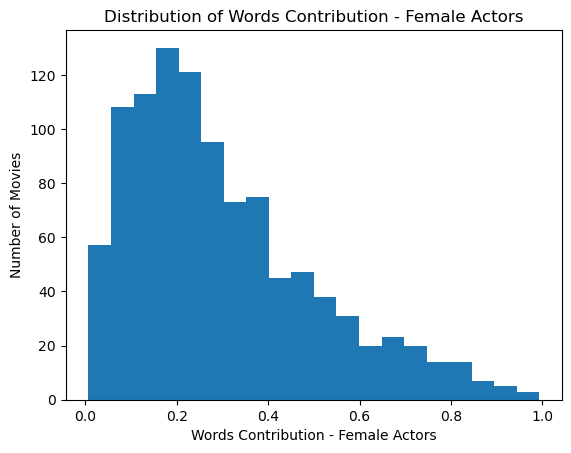

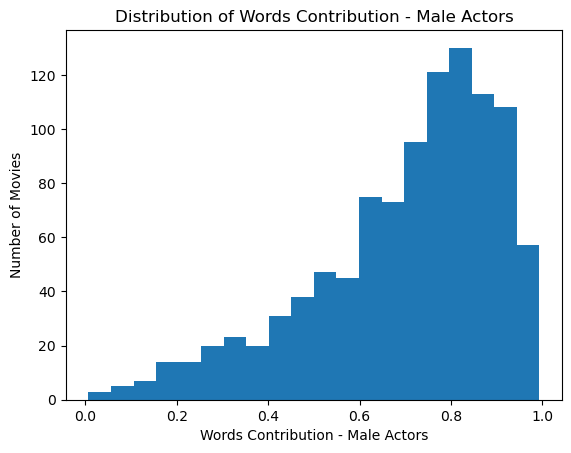

In [24]:
words_spoken = train[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead"]]
words_spoken.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead"}, inplace = True)

words_spoken["no_of_actors"] = words_spoken.male_actors + words_spoken.female_actors
words_spoken["female_presence"] = words_spoken.female_actors / words_spoken.no_of_actors
words_spoken["male_presence"] = words_spoken.male_actors / words_spoken.no_of_actors

# Adding lead's word count to respective gender
words_spoken.number_words_female = words_spoken.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken.number_words_male = words_spoken.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Calculating the percentage word contribution for each gender
words_spoken["words_contribution_female"] = words_spoken.number_words_female / (words_spoken.number_words_female + words_spoken.number_words_male)
words_spoken["words_contribution_male"] = words_spoken.number_words_male / (words_spoken.number_words_female + words_spoken.number_words_male)

draw_histogram(words_spoken.words_contribution_female, 20, "Words Contribution - Female Actors", "Number of Movies", "Distribution of Words Contribution - Female Actors")
draw_histogram(words_spoken.words_contribution_male, 20, "Words Contribution - Male Actors", "Number of Movies", "Distribution of Words Contribution - Male Actors")

Then we check if there is a balance in gender when it comes to the number of words spoken by actors considering the gender composition of the actors involved in the movies. We do this by normalizing the total number of words spoken by each gender group (dividing the word contribution by the gender presence).

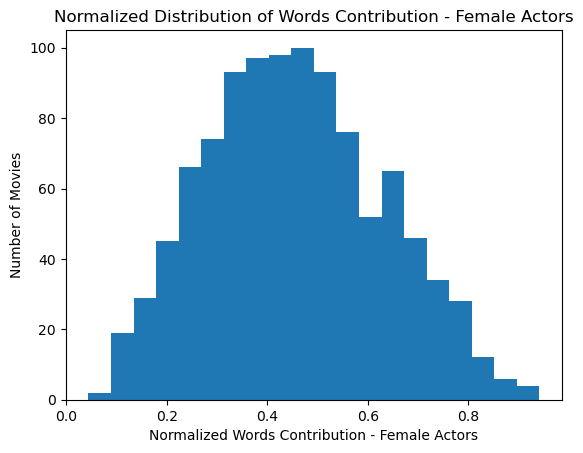

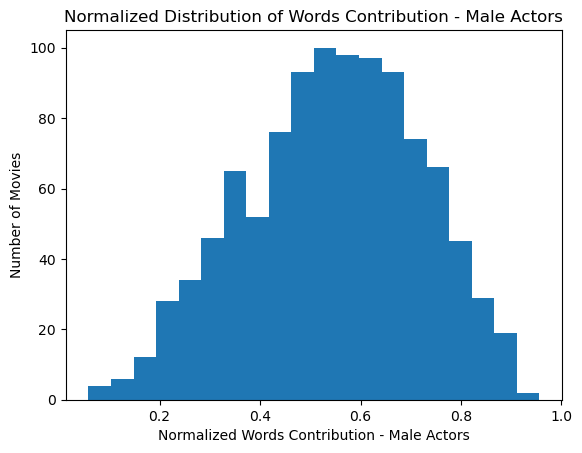

In [23]:
words_spoken_normalized = train[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead"]]
words_spoken_normalized.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead"}, inplace = True)

words_spoken_normalized["no_of_actors"] = words_spoken_normalized.male_actors + words_spoken_normalized.female_actors
words_spoken_normalized["female_presence"] = words_spoken_normalized.female_actors / words_spoken_normalized.no_of_actors
words_spoken_normalized["male_presence"] = words_spoken_normalized.male_actors / words_spoken_normalized.no_of_actors

# Adding lead's word count to respective gender
words_spoken_normalized.number_words_female = words_spoken_normalized.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken_normalized.number_words_male = words_spoken_normalized.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Normalizing the words spoken based on presence
words_spoken_normalized.number_words_female = words_spoken_normalized.apply(lambda row: (row.number_words_female / row.female_presence) if row.female_presence > 0 else row.number_of_female, axis = 1)
words_spoken_normalized.number_words_male = words_spoken_normalized.apply(lambda row: (row.number_words_male / row.male_presence) if row.male_presence > 0 else row.number_of_male, axis = 1)

# Calculating the percentage word contribution for each gender
words_spoken_normalized["words_contribution_female"] = words_spoken_normalized.number_words_female / (words_spoken_normalized.number_words_female + words_spoken_normalized.number_words_male)
words_spoken_normalized["words_contribution_male"] = words_spoken_normalized.number_words_male / (words_spoken_normalized.number_words_female + words_spoken_normalized.number_words_male)

draw_histogram(words_spoken_normalized.words_contribution_female, 20, "Normalized Words Contribution - Female Actors", "Number of Movies", "Normalized Distribution of Words Contribution - Female Actors")
draw_histogram(words_spoken_normalized.words_contribution_male, 20, "Normalized Words Contribution - Male Actors", "Number of Movies", "Normalized Distribution of Words Contribution - Male Actors")